# Parte audio

In [6]:
import IPython.display as ipd
dir='audios/wav/es-0015.wav'
ipd.Audio(dir)

In [24]:
dir2='audios/wav/es-0016.wav'
ipd.Audio(dir2)

In [23]:
dir3='audios/wav/es-0017.wav'
ipd.Audio(dir3)

In [7]:
import librosa
data, sampling_rate = librosa.load(dir)

In [15]:
data
print(sampling_rate)

22050


Populating the interactive namespace from numpy and matplotlib


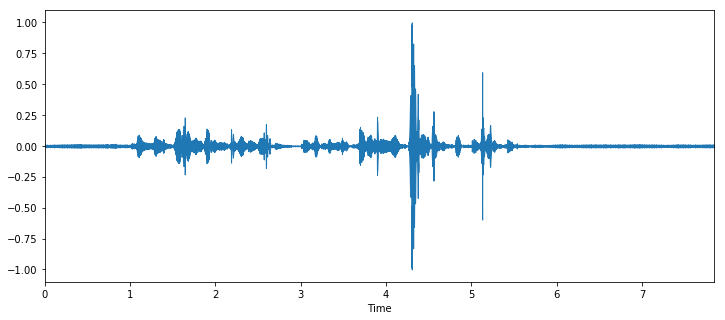

In [18]:
% pylab inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
# muestra la forma de la onda
plt.figure(figsize=(12, 5))
librosa.display.waveplot(data, sr=sampling_rate)

Basado en [basado en librosa demo](https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb)

In [55]:
# importación de librerías.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
# and IPython.display for audio output
import IPython.display
# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

Por defecto librosa calculará de nuevo la señal a 22050HZ
Podemos cambiar este comportamiento con librosa.load(audio_path, sr=44100)modifica la muestra a 44.1khz o librosa.load(audio_path, sr=None) para desahabilitar el remuestro.




In [58]:
y, sr = librosa.load(dir,sr=16000)# pasando la direccion del archivo

# Mel spectrogram

Mostraremos como se calcula el espectrograma Mel desde una señal de audio


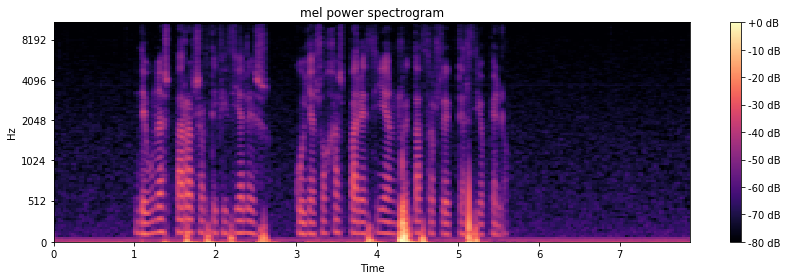

In [59]:

# Vamos a crear y mostra una mel-scaled powe(energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Lo convertiremos a la escala log (dB). usaremos el peak power (max) como referencia
log_S = librosa.power_to_db(S, ref=np.max)

# Crearemos una nueva figura
plt.figure(figsize=(12,4))

# Mostraremos el espectrograma en la escala MEL
# Los parametros de la tasa de la muestra y longitud de salto(hop length)son usados para representar el eje de tiempo
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

plt.title('mel power spectrogram')

# dibujo de barra de colores. draw a color bar
plt.colorbar(format='%+02.0f dB')

# haciendo a la figura layout compact
plt.tight_layout()



# Harmonic-percussive source separation
Antes de realizar cualquier análisis de señal, separemos los componentes armónicos y percusivos del audio. Esto es bastante fácil de hacer con el módulo de efectos.

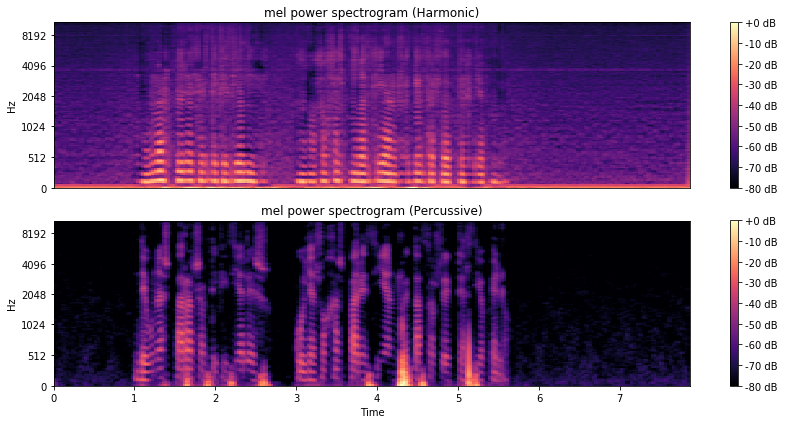

In [60]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
# como lucen los espectrogramas
# creamos y mostremos mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()



# Chromagram
Vamos a extraer las características [chroma](https://en.wikipedia.org/wiki/Pitch_class) para representar la información de la clase de voz


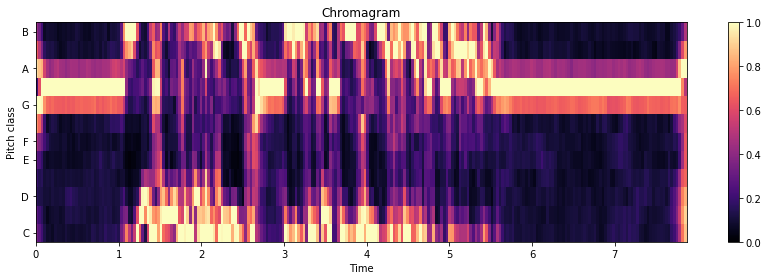

In [62]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()


# MFCC

Mel-frequency cepstral coefficients son comunmente usados para representar la textura y el timbre de sonido.


/home/visoc/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


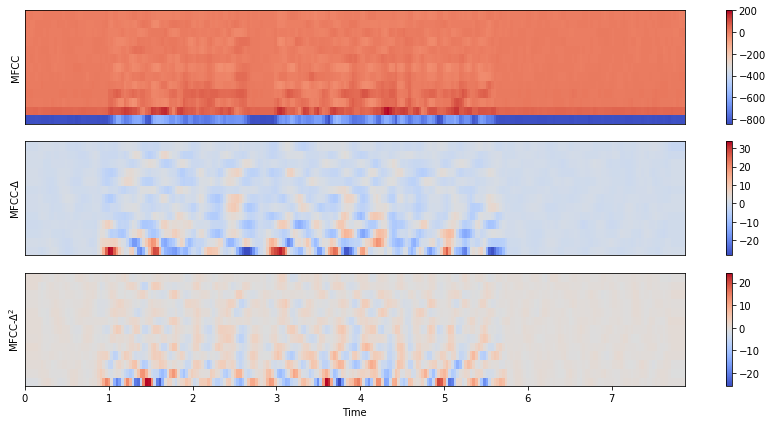

In [63]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

# Parte texto


In [ ]:
#notas convertir el conjunto de datos en en un dataframe o cvs preferencia data frame busquemos u
#una función general la primera prueba se hara con un pequeño conjunto de apalabra


In [49]:
with open('audios2/etc/oraciones.txt') as f:
    read_data = f.read()
f.closed
read_data
data=read_data.split('\n')
data
audio_name=[]
for i in range(len(data)):
    audio_name.append('S'+str(i+1))
audio_name
datos=pd.DataFrame({'file_name':audio_name, 'sentence':data})
datos.sentence

0    De unas parras artificiales, cuyas hojas parec...
1    Sillones de floreada cretona en torno de las m...
2    A las que se acogían grupos de personas para e...
3    Manteca y mermeladas el pan tostado, husmear e...
4    Camareros rubios de corta chaqueta azul y boto...
5    orteando los promontorios de los respaldos, lo...
6    Una vidriera, de pared a pared, formada de peq...
7    Dejaba ver el salón inmediato, blanco también,...
8    Los asientos tapizados de seda rosa, igual a l...
9                       Estaban ocupados por señoras. 
Name: sentence, dtype: object

In [50]:
datos.to_csv("muestra.csv",index=False)